
- 0205에 전처리한 데이터 셋 사용 - p_train ,p_test
- oversampling 시행

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train      = pd.read_csv("p_train.csv")
test       = pd.read_csv("p_test.csv")

train = train.drop(columns=["Unnamed: 0","index"])
test = test.drop(columns=["Unnamed: 0","index"])

In [4]:
train

,title,topic_idx
0,인천에서핀란드 항공기 결항 휴가철 여행객 분통,4
1,실리콘밸리 넘어서겠다 구글 15조원 들여 미국전역 거점화,4
2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,NYT 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려,4
4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...
45649,KB금융 미국 IB 스티펠과 제휴 선진국 시장 공략,1
45650,서울교육청 신종코로나 확산에 개학 연기 휴업 검토,2
45651,키움증권 2020 키움 영웅전 실전투자대회,1
45652,답변하는 배기동 국립중앙박물관장,2


In [5]:
test

,title
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,어버이날 맑다가 흐려져 남부지방 옅은 황사
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...
9126,인천 오후 3시35분 대설주의보 눈 3.1CM 쌓여
9127,노래방에서 지인 성추행 외교부 사무관 불구속 입건
9128,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,아리랑TV 아프리카개발은행 총회 개회식 생중계


# oversampling

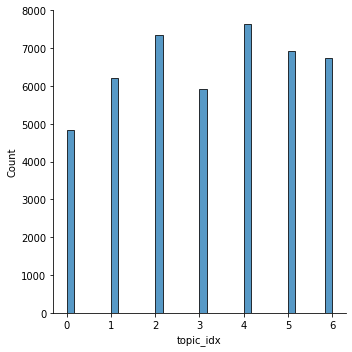

In [6]:
sns.displot(train.topic_idx)

In [7]:
from imblearn.over_sampling import RandomOverSampler

In [8]:
# SMOTE : 오버샘플링
titles_t = train.title.to_numpy().reshape(-1, 1)
labels_t = train.topic_idx.to_numpy().reshape(-1, 1)
oversample = RandomOverSampler()
X_oversample, y_oversample = oversample.fit_resample(titles_t, labels_t)
train = pd.DataFrame({"title": X_oversample.reshape(-1), 'topic_idx': y_oversample.reshape(-1)})

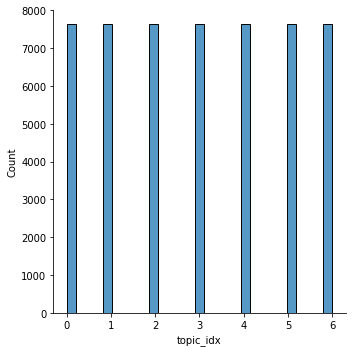

In [9]:
# SMOTE로 클래스별 비율 맞춰준 후 distplot
sns.displot(train.topic_idx)

# autoKeras
https://magoker.tistory.com/27

AutoKeras는 베이지안 최적화를 통해 효율적인 신경 구조 검색을위한 네트워크 형태를 유도 할 수있는 새로운 프레임워크입니다. 
- 검색 공간을 효율적으로 탐색하기 위해 신경망 커널과 트리 구조의 추천 함수 최적화 알고리즘을 개발. 
- 추천함수는 현재 입력된 값과 확률적 추정 결과값을 바탕으로, 찾고자하는 이상적인 최적의 상태를 찾는데 있어서 다음으로 시험해볼 입력값을 추천해주는 함수. 
- AugoKeras는 아직 pre-relase 버전임에도 불구하고 많이 사용

1. auto featue engineering
2. neural search architecture
3. hyper parameter tuning


- ImageClassifier (이미지 분류)
- ImageRegressor (이미지 회귀)
- TextClassifier (텍스트 분류)
- TextRegressor (텍스트 회귀)
- StructuredDataClassifier (구조화 된 데이터 분류)
- StructuredDataRegressor (구조화된 데이터 회귀)


일부 데이터 전처리만으로 비교적 최적 결과 도출

In [10]:
!pip install autokeras keras-tuner konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.5/337.5 KB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.9 MB/s eta 0:00:00


In [11]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh
%cd ..

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 9.36 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-02-22 07:21:52--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::3403:4be7, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bb

In [13]:
import autokeras as ak

In [15]:
x_train = train['title'].values
y_train = train['topic_idx'].values

텍스트 분류에 적합하다고 생각하는 탐색 공간을 설정하고 모델 아키텍쳐 탐색, 오토모델을 사용해 탐색 공간을 직접 정의해 탐색

In [18]:
# 최적 모델 탐색

input_node = ak.TextInput() # 텍스트를 다루는 입력 데이터
output_node = ak.TextBlock()(input_node) # 텍스트를 다루는 출력 데이터
output_node = ak.ClassificationHead()(output_node)

# AutoModel을 사용하면 탐색 공간을 직접 정의하며 탐색 가능 (TextClassifier 대신)
clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=5) #모델 찾는 횟수, 모델 탐색을 거쳐 최적 모델 선정

# 모델 인스턴스의 fit 함수를 이용해 학습
clf.fit(x_train, y_train, epochs=5)
model = clf.export_model()

Trial 5 Complete [00h 05m 50s]
val_loss: 0.6937888264656067

Best val_loss So Far: 0.5859342217445374
Total elapsed time: 00h 38m 08s
Epoch 1/5
1669/1669 [==============================] - 70s 41ms/step - loss: 1.3256 - accuracy: 0.5535
Epoch 2/5
1669/1669 [==============================] - 66s 40ms/step - loss: 0.7468 - accuracy: 0.7541
Epoch 3/5
1669/1669 [==============================] - 65s 39ms/step - loss: 0.6351 - accuracy: 0.7912
Epoch 4/5
1669/1669 [==============================] - 69s 41ms/step - loss: 0.5075 - accuracy: 0.8354
Epoch 5/5
1669/1669 [==============================] - 69s 41ms/step - loss: 0.4442 - accuracy: 0.8560


In [21]:
# 발견된 최적 모델 추출 : tf.keras.models
#tf.keras.backend.clear_session()
#model = tf.keras.models.load_model('./auto_model/best_model')

In [20]:
# 추출 모델 확인
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLast  (None, 1)                0         
 Dim)                                                            
                                                                 
 text_vectorization (TextVec  (None, 64)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 64, 128)           640128    
                                                                 
 dropout (Dropout)           (None, 64, 128)           0         
                                                                 
 conv1d (Conv1D)             (None, 58, 32)            28704 

In [22]:
pred_test = model.predict(test.title.values)

286/286 [==============================] - 2s 8ms/step


In [24]:
topic = []
for i in range(len(pred_test)):
    topic.append(np.argmax(pred_test[i]))

In [27]:
submission = pd.read_csv("sample_submission.csv")

In [28]:
submission['topic_idx'] = topic

In [29]:
submission

,index,topic_idx
0,45654,6
1,45655,6
2,45656,6
3,45657,6
4,45658,6
...,...,...
9126,54780,6
9127,54781,6
9128,54782,6
9129,54783,6
